In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('UpdatedResumeDataSet.csv')
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [3]:
df.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


Exploring Categories

In [4]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

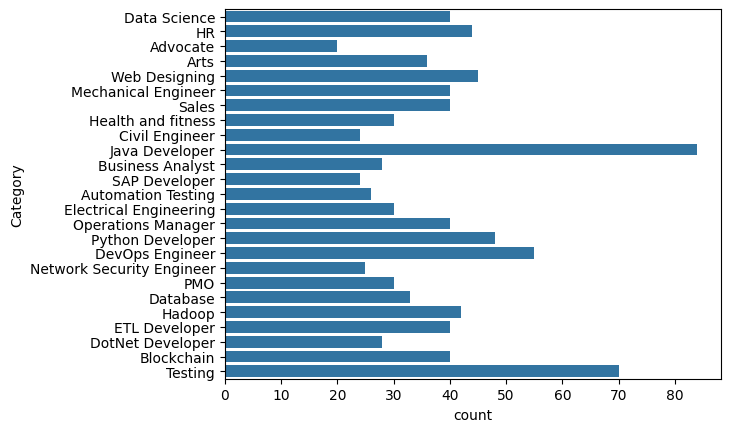

In [5]:
sns.countplot(df['Category'])

In [6]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [7]:
df['Category'].nunique()

25

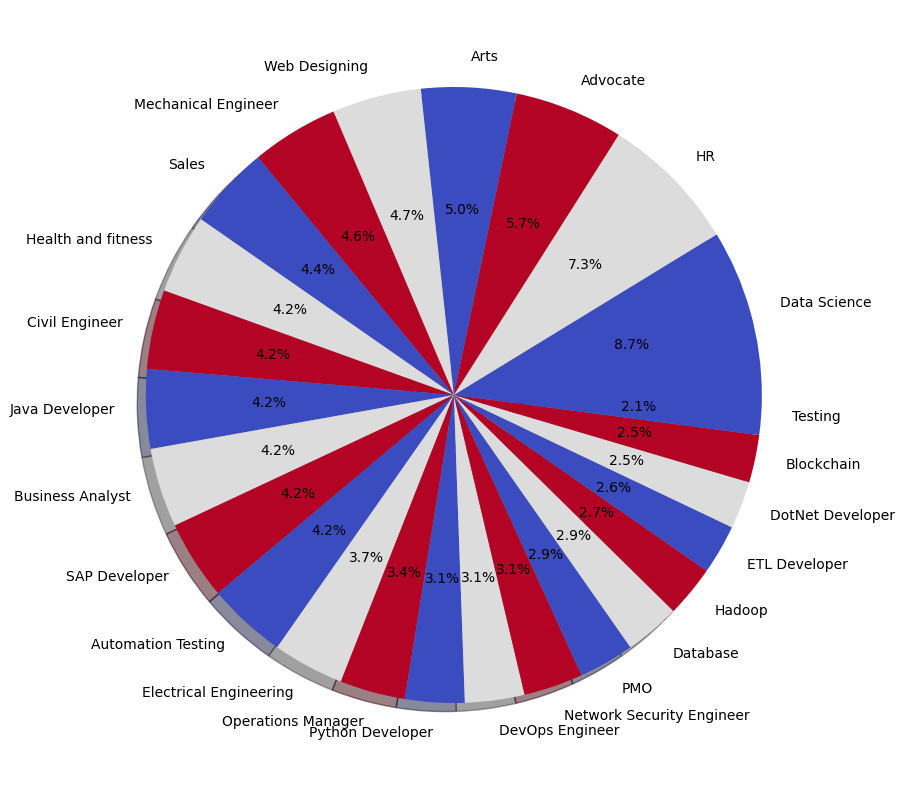

In [8]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()

plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True,colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

Exploring Resume

In [9]:
df['Category'][0]

'Data Science'

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

cleaning the data

In [11]:
import re

def cleanResume(txt):
    cleanText = re.sub('http\S+\s*', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+', ' ', cleanText)
    cleanText = re.sub('@\S+', ' ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^x00-x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [12]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [13]:
df['Resume']

0      Skills Programming Languages P thon pandas num...
1      Education Details Ma 2013 to Ma 2017 B E UIT R...
2      Areas of Interest Deep Learning Control S stem...
3      Skills R P thon SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Har an...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [14]:
df

,Category,Resume
0,Data Science,Skills Programming Languages P thon pandas num...
1,Data Science,Education Details Ma 2013 to Ma 2017 B E UIT R...
2,Data Science,Areas of Interest Deep Learning Control S stem...
3,Data Science,Skills R P thon SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Har an...
...,...,...
957,Testing,Computer Skills Proficient in MS office Word B...
958,Testing,Willingness to a ept the challenges Positive ...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


Words into Categorical values

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [17]:
print(df['Category'].unique())

[ 6 12  0  1 24 16 22 14  5 15  4 21  2 11 18 20  8 17 19  7 13 10  9  3
 23]


In [18]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      

Vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredtext=tfidf.transform(df['Resume'])

In [20]:
requiredtext

<962x7271 sparse matrix of type '<class 'numpy.float64'>'
	with 166995 stored elements in Compressed Sparse Row format>

Splitting

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredtext, df['Category'], test_size=0.2, random_state=42)

In [22]:
X_train.shape

(769, 7271)

In [23]:
X_test.shape

(193, 7271)

Train the model and classification report

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
clf= OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9844559585492227


Prediction System

In [26]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [28]:
myresume='''Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)'''

In [30]:
import pickle 
clf=pickle.load(open('clf.pkl','rb'))

cleaned_resume=cleanResume(myresume)

input_features=tfidf.transform([cleaned_resume])

prediction_id=clf.predict(input_features)[0]

category_mapping ={
    6: 'Data Science', 
    12: 'HR', 
    0: 'Advocate', 
    1: 'Arts', 
    24: 'Web Designing',
    16: 'Mechanical Engineer', 
    22: 'Sales', 
    14: 'Health and fitness', 
    5: 'Civil Engineer',
    15: 'Java Developer', 
    4: 'Business Analyst', 
    21: 'SAP Developer', 
    2: 'Automation Testing',
    11: 'Electrical Engineering', 
    18: 'Operations Manager', 
    20: 'Python Developer',
    8: 'DevOps Engineer', 
    17: 'Network Security Engineer', 
    19: 'PMO', 
    7: 'Database',
    13: 'Hadoop', 
    10: 'ETL Developer', 
    9: 'DotNet Developer', 
    3: 'Blockchain', 
    23: 'Testing'

}

category_name=category_mapping.get(prediction_id,"Unknown")
print("Predicted Category:",category_name)
print(prediction_id)



Predicted Category: Health and fitness
14
